# PyFolding SI Notebook 1
---

[Author] ERGM

---


## Fitting equilibrium & kinetic folding data to simple models

In this notebook we will show how equilbrium and kinetic folding data can be imported into a notebook and fitted to folding models. We also show how you can automate fitting data to a series of models and automate using different starting parameters/variables!

If you are less script/computer orientated, you can simply change the data paths/variables, etc for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).

---

### Data Format

Datasets should be in .csv files where:

1. The 1st row should contain the data titles
2. the 1st column should contain the x-values 
3. The subsequent columns should contain the y-values. 
4. You can have different data sets in different .csv files or all in one (as long as there is only one x-value column).
5. If you wish to perform global analyses on folding or equilibrium data, the datasets concerned must be in the same .csv
6. Except for global analyses using the Ising model, here each dataset must have its own .csv 

---

Example .csv structure:

[Urea] (M)	  | Fraction Unfolded FKBP12
:-----------: | :------------------------:
0	          | -0.00207
0.267	      | 0.00307
0.533	      | -0.00688
0.8	          | 0.00605
1.07	      | 0.00232
...           | ...

---

#### First off lets load pyfolding & pyplot into this ipython notebook (pyplot allows us to plot more complex figures of our results):

In [1]:
# use this command to tell Jupyter to plot figures inline with the text
%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

### Now, we need to load some data to analyse.

I will import the equilibrium denaturation & unfolding/folding kinetics of wild-type FKBP12 from:

`2. Main E.R.G., Fulton K.F. & Jackson S.E. (1999) “The folding pathway of FKBP12 and characterisation of the transition state.” Journal of Molecular Biology, 291, 429-444.`

#### Considerations
1. Kinetics data should be entered as rate constants ( *k* ) and NOT as the `log` of the rate constant.
2. There can be no "empty" x-axis cells in the .csv file for kinetics data.


In [2]:
# start by loading a data set
# arguments are "path", "filename"

pth = "../examples/FKBP12/"
Equilm_FKBP12 = pyfolding.read_equilibrium_data(pth,"Equilm_FKBP12.csv")
Kinetics_FKBP12 = pyfolding.read_kinetic_data(pth,"Kinetics_FKBP12.csv")


---

#### Lets plot the data.

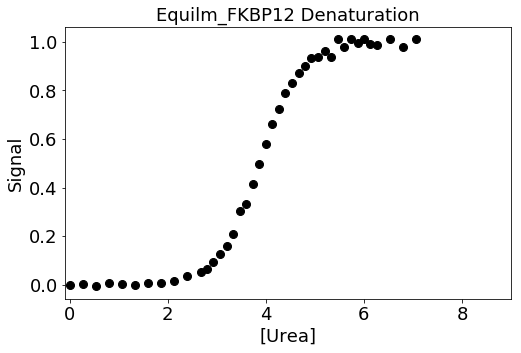

In [3]:
# now plot the equilm data 
Equilm_FKBP12.plot()

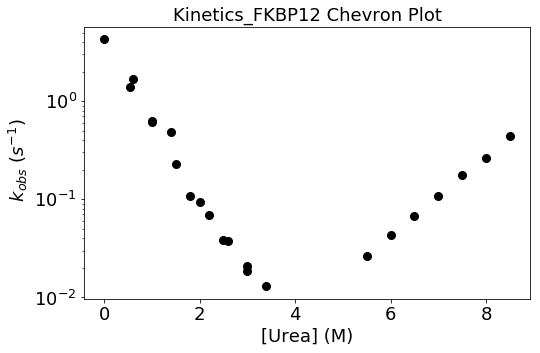

In [4]:
# now the kinetics
Kinetics_FKBP12.plot()

---

#### OK, now we can try fitting the data to protein folding models. 

We will start by fitting the equilibrium data to a two state folding model, without sloping baslines (as the data has been processed as Fraction Unfolded).

#### We can list the models in pyfolding:



In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

# After the model name:
#'Verified: True' signifies that we have tested the model and it functions as expected.
#'Verified:False' signifies that the model has been tested, but noy rigourously.

[('CurvedChevronPolynomialFit', 'Verified: True'),
 ('HeteropolymerIsingEquilibrium', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: True'),
 ('ThreeStateEquilibrium', 'Verified: True'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: True'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: True'),
 ('TwoStateDimerEquilibrium', 'Verified: True'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

---
#### We can print out the model for viewing and then print out the variables of the model.



In [6]:
# printing the equation for viewing

# models.TwoStateEquilibrium().print_equation()

# as can be seen this model fits data that has been normalised to "fraction folded" or "fraction unfolded".

In [7]:
# print the info
models.TwoStateEquilibrium().info()

<IPython.core.display.Math object>

 Two state equilibrium denaturation curve - No sloping baseline.

	Folding Scheme:
		N <-> D

	Params:
		F = Fraction unfolded
		m = m-value
		x = denaturant concentration (M)
		d50 = denaturant midpoint (M)
		R = Universal Gas Constant (kcal.mol-1.K-1)
		T = Temperature (Kelvin)

	Reference:
		Clarke and Fersht. Engineered disulfide bonds as probes of
		the folding pathway of barnase: Increasing the stability
		of proteins against the rate of denaturation.
		Biochemistry (1993) vol. 32 (16) pp. 4322-4329
	


In [8]:
# Printing the model variables

# The function has two parts:
# part1 states the model you want to find about: "******()"
# part2 prints the variables: ".fit_func_args"

TwoStateEquilibrium().fit_func_args

['m', 'd50']

---

#### Or we can skip straight to fitting the data.

In [9]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

#1st select the fit function and associates it with the data
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium


#then fit it. 
#in the brackets you can define starting values for the variables -
#input in the order printed above with the".fit_func_args'
Equilm_FKBP12.fit(p0=[2,4])

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)
Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.43404 ± 0.01370    	 95% CI[   1.43061,    1.43748]
(f) d50    3.86730 ± 0.00441    	 95% CI[   3.86619,    3.86841]
--------------------------------------------------------------------------------
R^2: 0.99933




---

#### We can print the resultant graph:


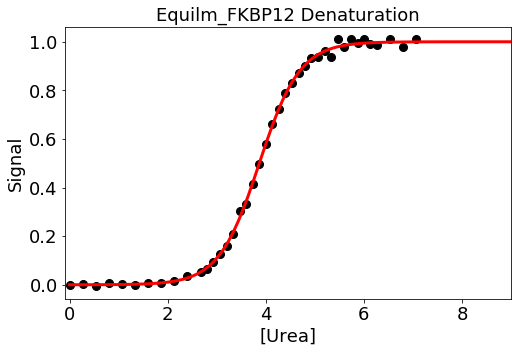

In [10]:
Equilm_FKBP12.plot()

---

### We can fit the kinetic data separately too:


In [11]:
# select the fit function
Kinetics_FKBP12.fit_func = models.TwoStateChevron

In [12]:
# printing the equation for viewing
models.TwoStateChevron().info()

# Lets also see what the input variables are also
models.TwoStateChevron().fit_func_args

<IPython.core.display.Math object>

 Two state chevron plot.

	Folding Scheme:
		N <-> D

	Params:
		k obs = rate of unfolding or refolding at a particular denaturant concentration
		kf = rate constant of refolding at a particular denaturant concentration
		mf = the gradient of refolding arm of the chevron
		ku = rate constant of unfolding at a a particular denaturant concentration
		mu = the gradient of unfolding arm of the chevron
		x = denaturant concentration (M)

	Notes:
		Jackson SE and Fersht AR.  Folding of chymotrypsin inhibitor 2.
		1. Evidence for a two-state transition.
		Biochemistry (1991) 30(43):10428-10435.
	


['kf', 'mf', 'ku', 'mu']

In [13]:
# 1st select the fit function and associates it with the data
Kinetics_FKBP12.fit_func = models.TwoStateChevron

# 2nd fit the data with initial values (input these as per the list of input variables above)
Kinetics_FKBP12.fit(p0=[4,2,0.0001,1])

Fitting results
ID: Kinetics_FKBP12
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf    4.21728 ± 0.96938    	 95% CI[   3.97765,    4.45690]
(f) mf    1.86223 ± 0.12761    	 95% CI[   1.83068,    1.89377]
(f) ku    0.00019 ± 0.00020    	 95% CI[   0.00014,    0.00024]
(f) mu    0.90557 ± 0.14504    	 95% CI[   0.86972,    0.94142]
--------------------------------------------------------------------------------
R^2: 0.99234




---

#### We can print the resultant graph:
This is similar to the equilm but we need to remember to use a natural log plot with kinetics dataset and fit.

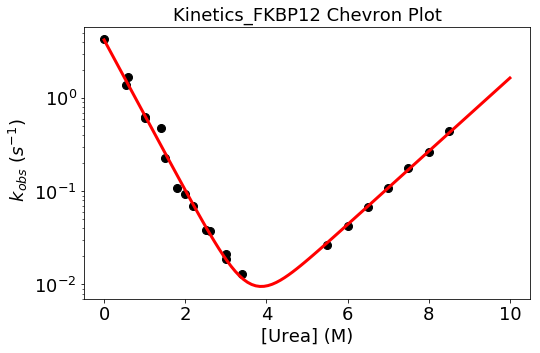

In [14]:
pyfolding.plot_chevron(Kinetics_FKBP12)

---

### We can also plot a fancier graph that shows both Equilm and Kinetics together

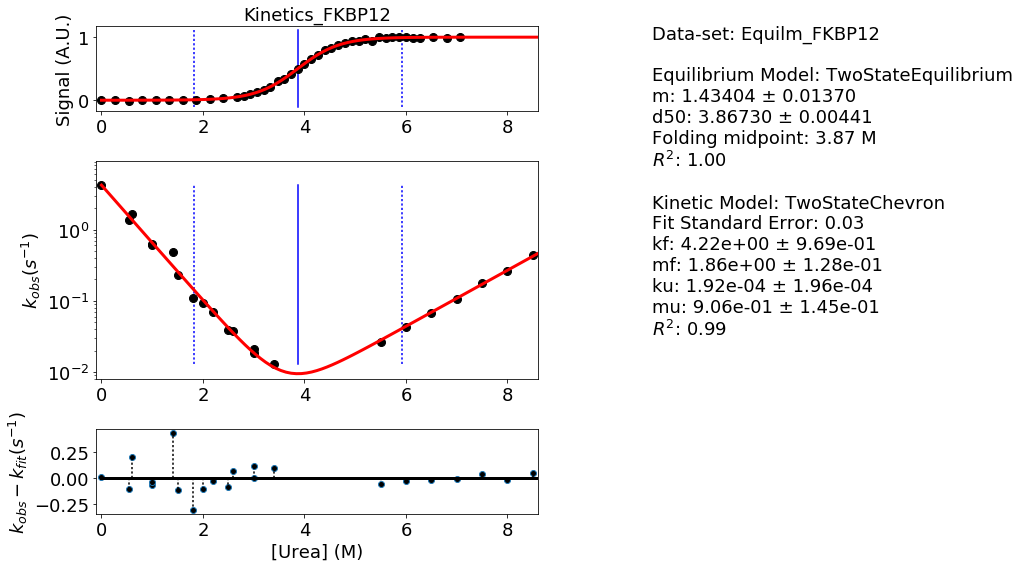

In [15]:
# pyfolding.plot_figure(Equilm_FKBP12, Kinetics_FKBP12, display=True, pth='/users/ergm/', save=True)
pyfolding.plot_figure(Equilm_FKBP12, Kinetics_FKBP12, display=True)
# the "pth" and save=True part writes out a pdf of the figure below.

### Saving out the fit results as a .CSV

In [16]:
# save out the data
# Equilm_FKBP12.save_fit('/Users/ergm/Desktop/test.csv')



---
### Fit to multiple models

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.43404 ± 0.01370    	 95% CI[   1.43061,    1.43748]
(f) d50    3.86730 ± 0.00441    	 95% CI[   3.86619,    3.86841]
--------------------------------------------------------------------------------
R^2: 0.99933




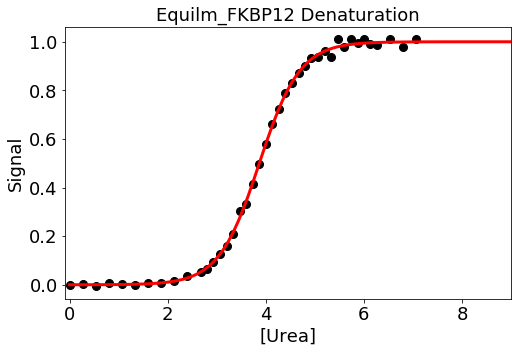

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibriumSloping
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) alpha_f   -0.00000 ± 0.00500    	 95% CI[  -0.00125,    0.00125]
(f) beta_f    -0.00005 ± 0.00375    	 95% CI[  -0.00099,    0.00089]
(f) alpha_u    0.99945 ± 0.03145    	 95% CI[   0.99157,    1.00733]
(f) beta_u     0.00035 ± 0.00513    	 95% CI[  -0.00093,    0.00164]
(f) m          1.43029 ± 0.03572    	 95% CI[   1.42134,    1.43923]
(f) d50        3.86799 ± 0.01326    	 95% CI[   3.86467,    3.87131]
--------------------------------------------------------------------------------
R^2: 0.99933




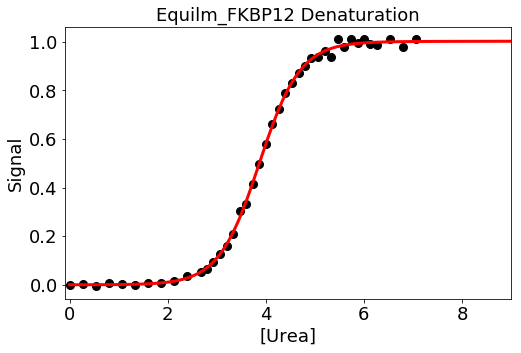

Fitting results
ID: Equilm_FKBP12
Model: HomozipperIsingEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(c) n               7.00000
(f) DG_intrinsic   23.50952 ± inf        	 95% CI[      -inf,        inf]
(f) m_intrinsic    -0.20501 ± inf        	 95% CI[      -inf,        inf]
(f) DG_interface  -28.35260 ± inf        	 95% CI[      -inf,        inf]
--------------------------------------------------------------------------------
R^2: 0.99933




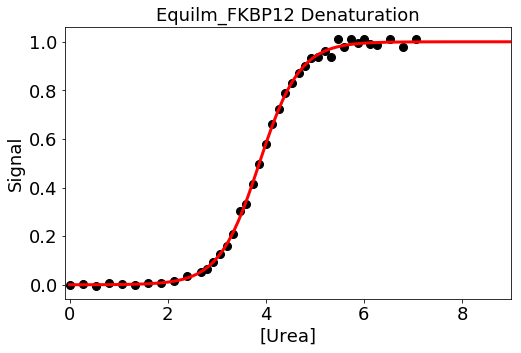

In [21]:
# make a list of models to be used to fit
models_to_fit = [models.TwoStateEquilibrium, 
                 models.TwoStateEquilibriumSloping, 
                 models.HomozipperIsingEquilibrium]

# and now lets fit them
for model in models_to_fit:
    Equilm_FKBP12.fit_func = model
    Equilm_FKBP12.fit()   
    Equilm_FKBP12.plot()

#### As you can see, each of the models has found a good fit with the default initial variables barring the homozipper.
We can refit the homozipper and give it better parameters and see if we get a fit (remember that this is just a "test" and FKBP12 is a two-state folding protein and should not really be fit to the homozipper/homopolymer Ising).

Lets first bring up the variables for the Homozipper:

In [18]:
# Lets also see what the input variables are
models.HomozipperIsingEquilibrium().fit_func_args

['n', 'DG_intrinsic', 'm_intrinsic', 'DG_interface']

Fitting results
ID: Equilm_FKBP12
Model: HomozipperIsingEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(c) n               2.00000
(f) DG_intrinsic    0.00000 ± inf        	 95% CI[      -inf,        inf]
(f) m_intrinsic     2.98000 ± inf        	 95% CI[      -inf,        inf]
(f) DG_interface   -2.01461 ± inf        	 95% CI[      -inf,        inf]
--------------------------------------------------------------------------------
R^2: -1.55003




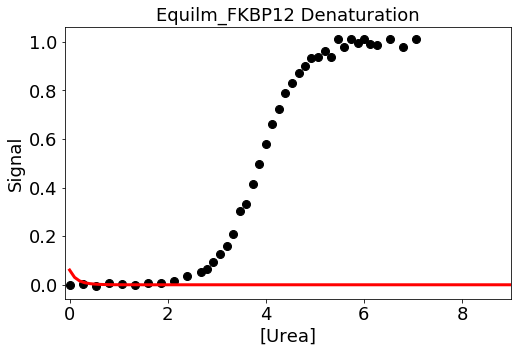

In [19]:
Equilm_FKBP12.fit_func = models.HomozipperIsingEquilibrium
Equilm_FKBP12.fit(p0=[2,3.5,-0.5,-5], constants=(('n',2),)) 
Equilm_FKBP12.plot()

    

So with better starting variables the model fits to the data, but as you can see there is not enough curves to tie down the parameters.........but this is to be expected!

---

### We can also get PyFolding to iterate over a range of initial parameters used (incase, for example, fitting your data is very dependent on your starting parameters).

In [20]:
#1st select the fit function and associates it with the data
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium

# iterate over some different parameters
for m in xrange(1,3):
    for d50 in xrange (2,4):
        Equilm_FKBP12.fit(p0=[m,d50])

Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.43404 ± 0.01370    	 95% CI[   1.43061,    1.43748]
(f) d50    3.86730 ± 0.00441    	 95% CI[   3.86619,    3.86841]
--------------------------------------------------------------------------------
R^2: 0.99933


Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.43404 ± 0.01370    	 95% CI[   1.43061,    1.43748]
(f) d50    3.86730 ± 0.00441    	 95% CI[   3.86619,    3.86841]
--------------------------------------------------------------------------------
R^2: 0.99933


Fitting results
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.43404 ± 0.01370    	 95% CI[   1.43061,    1.43748]
(f) d50    3.86730 ± 0.00441    	 95% CI[   3.86619,  

---

### End of this Notebook.

---